# Predictive Analytics for Medical Insurance Cost

### Overview

- This project involved building a regression model to predict medical insurance charges using attributes like age, BMI, number of children, smoking status, and region. The data was obtained from a Kaggle dataset containing 1,337 observations.

In [1]:
# Importing necessary libraries for data analysis and visualization
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import seaborn as sns

In [2]:
# Loading the 'insurance.csv' file from the specified path into a pandas DataFrame named 'med'
med=pd.read_csv('./insurance.csv')
med

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Building an Ordinary Least Squares (OLS) model.
# Dependent variable (y): charges
# Independent variables (x): age, sex, bmi, children, smoker, region
# Smoker and region are categorical variables

model =smf.ols('charges~age + sex + bmi + children + C(smoker) + C(region)',data=med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:28   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
sex[T.male]             -131.3144    332.945     -0.394      0.693    -784.470     521.842
C(smoker)[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
C(region)[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
C(region)[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
C(region)[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                      256.8564     11.899     21.587      0.000     233.514     280.199
bmi                      339.1935     28.599     11.860      0.000     283.088     395.298
children                 475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
model.bic

27160.296218430187

In [5]:
model2 =smf.ols('charges~age + sex + bmi + children + C(smoker)',data=med).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:28   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
sex[T.male]       -128.6399    333.361     -0.386      0.700    -782.609     525.329
C(smoker)[T.yes]  2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
age                257.7350     11.904     21.651      0.000     234.383     281.087
bmi                322.3642     27.419     11.757      0.000     268.576     376.153
children           474.4111    137.856      3.441      0.001     203.973     744.849
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since variable sex, region have a p-value > 0.05, we omit it from the model. And for simplicity purpose, we will also omit children in this case since we are focusing on the rest of the varibales

In [6]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
sex,5.716429e+06,1.0,0.155553,6.933475e-01
C(smoker),1.224468e+11,1.0,3331.968045,0.000000e+00
C(region),2.334312e+08,3.0,2.117343,9.622108e-02
age,1.712447e+10,1.0,465.983684,7.783217e-89
bmi,5.169225e+09,1.0,140.662697,6.498194e-31
children,4.375466e+08,1.0,11.906327,5.769682e-04
Residual,4.883953e+10,1329.0,NaN,NaN


In [7]:
new_model =smf.ols('charges~age + bmi + C(smoker)',data=med).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:28   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
C(smoker)[T.yes]  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
age                259.5475     11.934     21.748      0.000     236.136     282.959
bmi                322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Heatmap for pair-wise correlations

### Notes
Only numerical variables(age, bmi, children, charges) will show up here.

Potential problems when detecting correlations:
- It's a pair-wise realtionship since it doesn't evaluate all features all together.
- It omits the categorical variables

<Axes: >

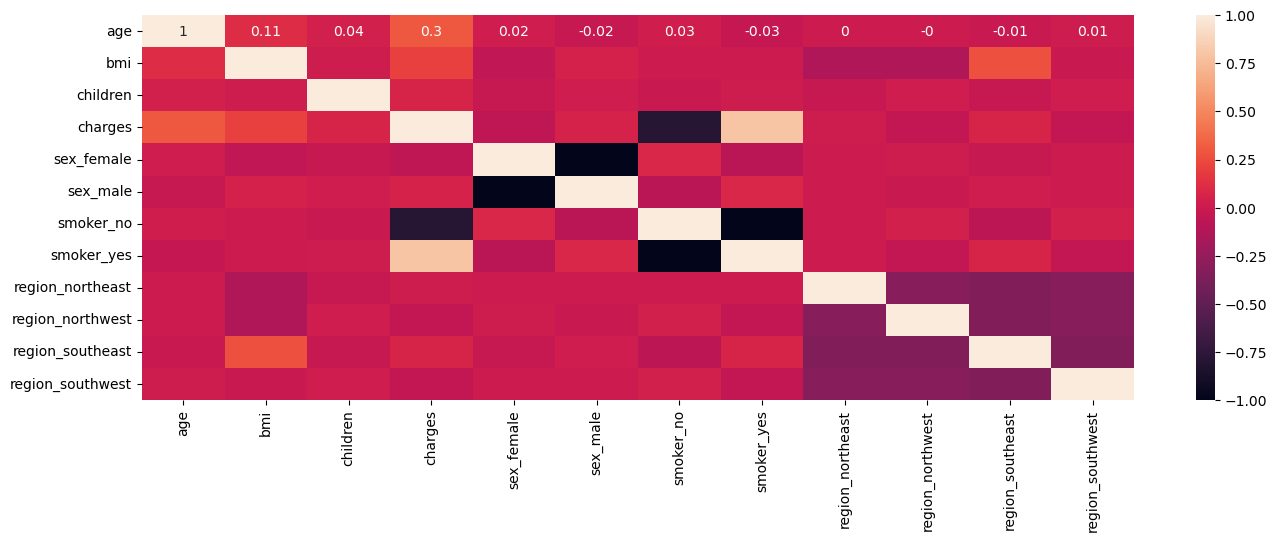

In [8]:
# Use pandas get_dummies function to convert 'sex' column to numerical
med_encoded = pd.get_dummies(med, columns=['sex','smoker','region'])

# Now you can calculate the correlation matrix
correlation_matrix = med_encoded.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

# VIF

### Variance Inflation Factor (VIF) provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity.

-  A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model, which may distort the statistical significance and confidence of the coefficient for the variable

In [9]:
# Dependent variable: Charges
# Independent variables: Age, bmi, Smoker
# 'C(smoker)' indicates that 'smoker' is a categorical variable
y, X = dmatrices('charges~age + bmi + C(smoker)', data=med, return_type='dataframe')

vif = pd.DataFrame()

# Calculating the VIF for each independent variable in 'X' and storing the results in the 'VIF Factor' column of 'vif'
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor          features
0   31.688157         Intercept
1    1.000669  C(smoker)[T.yes]
2    1.012747               age
3    1.012128               bmi


### Result:
No sig. high VIF indicating multicolinearity, hence dont have to exclude any variables.

Visualize influential points for new_model: charges~age + bmi + C(smoker)

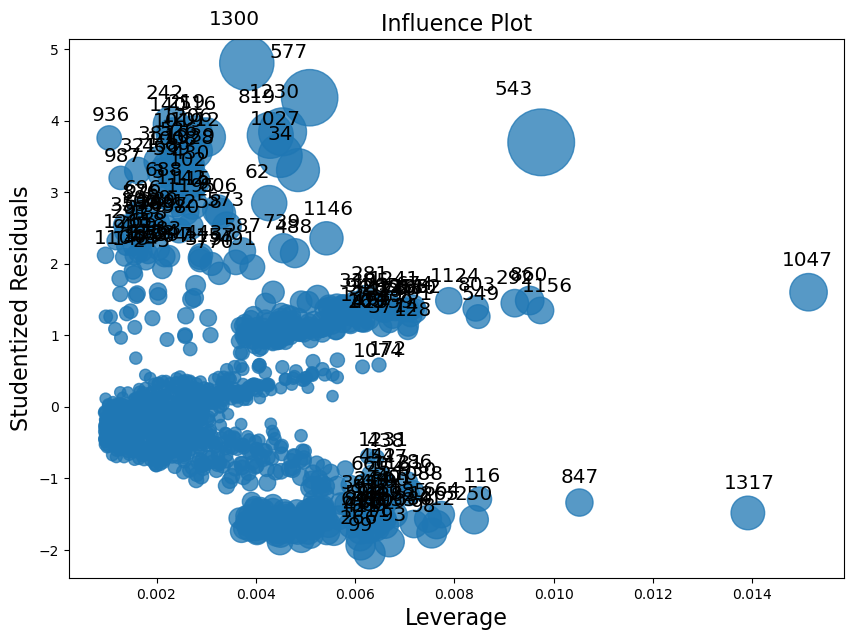

In [10]:
# Create a new figure and a set of subplots with a specified figure size
fig, ax = plt.subplots(figsize=(10,7))

# Generate an influence plot, which provides a visual summary of the influence each observation
fig=sm.graphics.influence_plot(new_model,ax=ax, criterion="cooks") 

In [11]:
infl = new_model.get_influence()

In [12]:
#threshold externally studentized residuals
n=1338
p=4
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

print(med.index[atyp_stud],reg_studs[atyp_stud])

Index([   3,    9,   34,   62,   99,  102,  115,  138,  140,  143,  219,  242,
        245,  289,  291,  305,  306,  321,  340,  355,  379,  387,  397,  429,
        430,  443,  468,  488,  491,  516,  520,  526,  539,  543,  573,  577,
        583,  587,  599,  637,  658,  688,  696,  739,  770,  806,  819,  858,
        876,  925,  936,  959,  964,  980,  987, 1008, 1012, 1019, 1027, 1039,
       1104, 1123, 1134, 1142, 1146, 1157, 1195, 1206, 1211, 1230, 1258, 1300,
       1328],
      dtype='int64') [ 2.92861178  2.75082316  3.30920227  2.84732459 -2.0467631   3.0724268
  2.82439838  2.4181574   3.79783728  2.09108346  3.80638518  3.95153954
  2.04829857  2.57785601  2.4462419   2.1110727   2.5870492   3.30393266
  2.55171394  2.54064006  2.04671228  3.43157414  2.10695987  2.24832186
  3.15817807  2.11824433  3.27391006  2.14835823  2.01936695  3.76962941
  2.55639917  3.45494418  2.49412033  3.69787647  2.52290213  4.32142422
  2.19959623  2.17807235  3.22338764  2.50554811  2.30

In [13]:
#Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(med.index[atyp_cook],reg_cook[atyp_cook])



Index([   3,    9,   11,   34,   58,   62,   64,   70,   85,   98,
       ...
       1258, 1265, 1274, 1282, 1288, 1300, 1306, 1317, 1321, 1328],
      dtype='int64', length=129) 3       0.004880
9       0.006107
11      0.003448
34      0.013241
58      0.004068
          ...   
1300    0.021750
1306    0.004162
1317    0.007756
1321    0.003277
1328    0.007266
Name: cooks_d, Length: 129, dtype: float64


### Removing influential points

In [14]:
index_1 = med.index[atyp_stud].tolist()
index_2 = med.index[atyp_cook].tolist()

union_list = list(set(index_1 + index_2))
print(union_list)

[3, 516, 1027, 1030, 520, 9, 1033, 11, 526, 1039, 530, 1047, 539, 543, 34, 549, 1062, 1080, 58, 573, 62, 1085, 64, 577, 70, 583, 587, 1100, 1104, 593, 85, 599, 607, 98, 99, 1123, 1124, 102, 617, 1134, 115, 116, 1139, 1142, 1146, 637, 638, 1156, 1157, 138, 140, 142, 143, 658, 664, 153, 1176, 156, 157, 674, 1195, 175, 688, 1206, 696, 185, 1211, 1230, 727, 1241, 219, 224, 739, 1252, 741, 1258, 235, 750, 1265, 242, 245, 250, 1274, 770, 1282, 1288, 265, 266, 1300, 281, 793, 1306, 799, 289, 291, 292, 803, 806, 1317, 296, 297, 1321, 1328, 305, 306, 819, 321, 330, 331, 847, 340, 857, 858, 860, 355, 362, 876, 379, 380, 896, 387, 397, 909, 411, 412, 925, 417, 936, 429, 430, 951, 443, 444, 959, 964, 966, 975, 468, 980, 987, 989, 994, 488, 1000, 491, 1008, 1011, 1012, 502, 1019]


In [15]:
med_updated = med.drop(union_list)
model_updated =smf.ols('charges~age + bmi + C(smoker)',data=med_updated).fit()
bp_test = het_breuschpagan(model_updated.resid, model_updated.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test))) 
# Heteroskedasticity exists

{'LM Statistic': 555.0877019896984, 'LM-Test p-value': 5.4845143442488904e-120}


In [16]:
stats.jarque_bera(model_updated.resid)
# Normality was violated

SignificanceResult(statistic=395.2632574619608, pvalue=1.4779991782049169e-86)

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

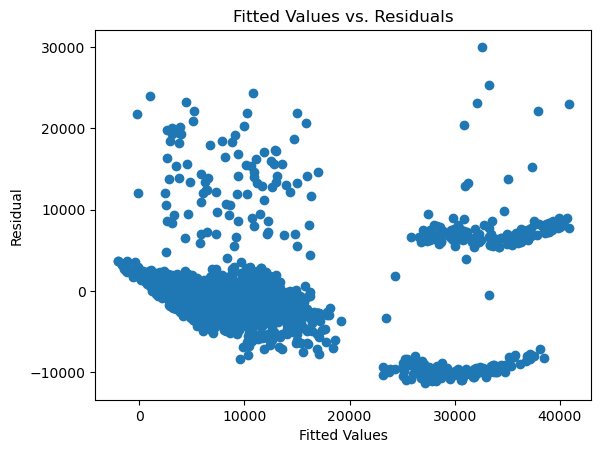

In [17]:
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

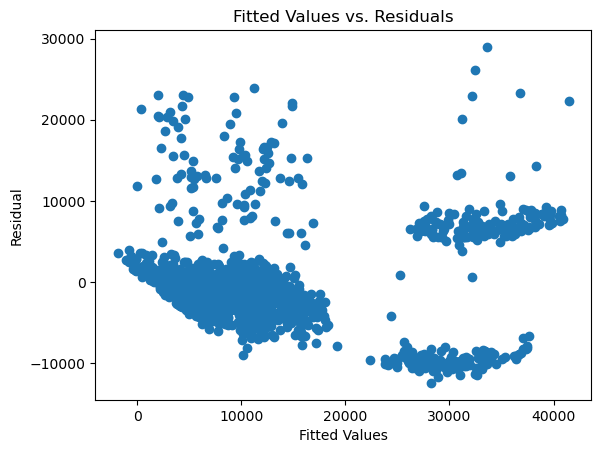

In [18]:
p = new_model.fittedvalues
res = new_model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

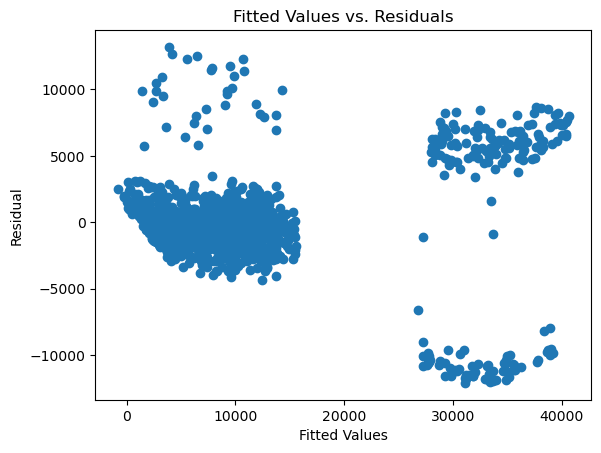

In [19]:
p = model_updated.fittedvalues
res = model_updated.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

# Natural log transformation

### Advantages:

- Making patterns in the data more interpretable2.
- Helping to meet the assumptions of inferential statistics2.
- Stabilizing the variance of the data1.

In [20]:
med['log_charges'] = np.log(med['charges'])

model_log = smf.ols('log_charges ~ age + sex + bmi + children + C(smoker) + C(region)', data=med).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:30   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

In [21]:
new_model_log = smf.ols('log_charges ~ age + sex + bmi + children + C(smoker)', data=med).fit()
print(new_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     861.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:30   Log-Likelihood:                -820.35
No. Observations:                1338   AIC:                             1653.
Df Residuals:                    1332   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0121      0.070  

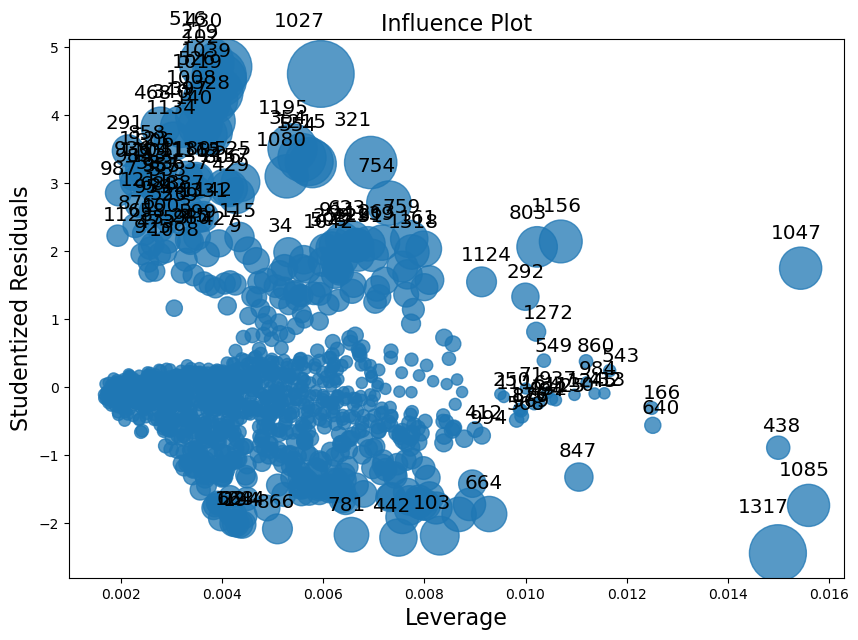

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
fig=sm.graphics.influence_plot(new_model_log,ax=ax, criterion="cooks") 

In [23]:
new_infl_log = new_model_log.get_influence()

In [24]:
#threshold externally studentized residuals (log)
n=1338
p=6
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=new_infl_log.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

print(med.index[atyp_stud],reg_studs[atyp_stud])

Index([   3,    9,   22,   34,  102,  103,  115,  140,  143,  161,  194,  219,
        223,  242,  245,  259,  263,  291,  305,  306,  321,  340,  353,  354,
        355,  387,  397,  427,  429,  430,  442,  468,  473,  503,  516,  520,
        525,  526,  533,  539,  554,  583,  599,  623,  637,  658,  663,  688,
        754,  759,  781,  803,  806,  858,  866,  876,  911,  925,  936,  957,
        959,  980,  983,  987, 1003, 1008, 1019, 1027, 1039, 1042, 1080, 1098,
       1104, 1123, 1128, 1134, 1139, 1142, 1156, 1157, 1162, 1189, 1195, 1211,
       1215, 1244, 1291, 1315, 1317, 1318, 1328, 1331],
      dtype='int64') [ 3.75007899  2.00681947 -2.01193433  1.9845687   4.51520654 -2.18245304
  2.20935221  3.71415087  2.99489813  2.03453581 -2.01917927  4.58011655
  2.08723116  2.58250709  2.16468664  2.08990668  2.1261854   3.4763633
  3.06056901  3.19758622  3.30344956  3.83029544  2.14719024  3.37654351
  2.86063438  2.61285693  3.85002433  2.11473928  2.81777321  4.71245634
 -2.20

In [25]:
#Cook's distance (log)
inflsum=new_infl_log.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(med.index[atyp_cook],reg_cook[atyp_cook])

Index([   3,    9,   11,   14,   30,   34,   57,   82,   92,   98,
       ...
       1265, 1288, 1291, 1315, 1317, 1318, 1321, 1328, 1331, 1337],
      dtype='int64', length=107) 3       0.008766
9       0.003033
11      0.003968
14      0.003379
30      0.003798
          ...   
1318    0.005135
1321    0.003055
1328    0.009620
1331    0.003655
1337    0.003188
Name: cooks_d, Length: 107, dtype: float64


In [26]:
index_1_log = med.index[atyp_stud].tolist()
index_2_log = med.index[atyp_cook].tolist()

union_list_log = list(set(index_1_log + index_2_log))
print(union_list_log)

[3, 516, 1027, 520, 9, 11, 525, 526, 1039, 14, 1042, 533, 22, 1047, 539, 30, 34, 554, 1080, 57, 1085, 577, 1093, 583, 1098, 1104, 82, 599, 1112, 92, 607, 98, 1123, 1124, 102, 103, 1128, 618, 1134, 623, 115, 1139, 1142, 637, 1156, 1157, 1162, 140, 143, 658, 663, 664, 161, 1189, 1195, 1196, 688, 1211, 1215, 194, 219, 1244, 223, 1265, 242, 754, 244, 245, 759, 259, 262, 263, 1288, 1291, 781, 291, 803, 1315, 806, 1317, 1318, 1321, 301, 1328, 305, 306, 1331, 819, 1337, 321, 847, 340, 854, 858, 353, 354, 355, 866, 876, 377, 890, 387, 397, 911, 925, 419, 936, 427, 429, 430, 442, 957, 959, 468, 980, 983, 473, 474, 987, 475, 476, 1003, 1008, 503, 1019]


In [27]:
med_updated_log = med.drop(union_list_log)
model_updated_log =smf.ols('log_charges ~ age + sex + bmi + children + C(smoker)',data=med_updated_log).fit()
bp_test = het_breuschpagan(model_updated_log.resid, model_updated_log.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 224.18858150836277, 'LM-Test p-value': 1.8819392099558684e-46}


In [28]:
stats.jarque_bera(model_updated_log.resid)

SignificanceResult(statistic=507.5610037773294, pvalue=6.088753820909501e-111)

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

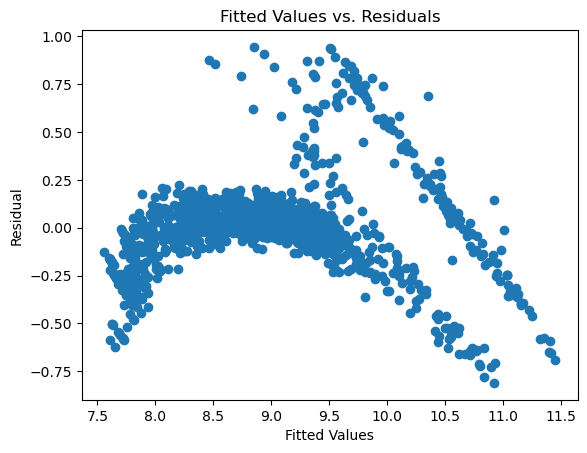

In [29]:
p = model_updated_log.fittedvalues
res = model_updated_log.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

# Box-cox Transformation

### The Box-Cox transformation is a statistical technique used to transform non-normal dependent variables into a normal shape.

In [30]:
# Apply the Box-Cox transformation to the 'charges' column of the 'med' DataFrame.
# The Box-Cox transformation is used to transform the 'charges' data to a normal distribution.
# The transformed data is stored in a new column 'boxcox_charges' in the 'med' DataFrame.
med['boxcox_charges'], _ = stats.boxcox(med['charges'])

# Fit an Ordinary Least Squares (OLS) model using the 'boxcox_charges' as the dependent variable
# 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' as independent variables.
model = smf.ols('boxcox_charges ~ age + sex + bmi + children + C(smoker) + C(region)', data=med).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         boxcox_charges   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     559.1
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:31   Log-Likelihood:                -1330.1
No. Observations:                1338   AIC:                             2678.
Df Residuals:                    1329   BIC:                             2725.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

In [31]:
new_model_box = smf.ols('boxcox_charges ~ age + sex + bmi + children + C(smoker)', data=med).fit()
print(new_model_box.summary())

                            OLS Regression Results                            
Dep. Variable:         boxcox_charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     876.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:12:31   Log-Likelihood:                -1341.5
No. Observations:                1338   AIC:                             2695.
Df Residuals:                    1332   BIC:                             2726.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.1001      0.104  

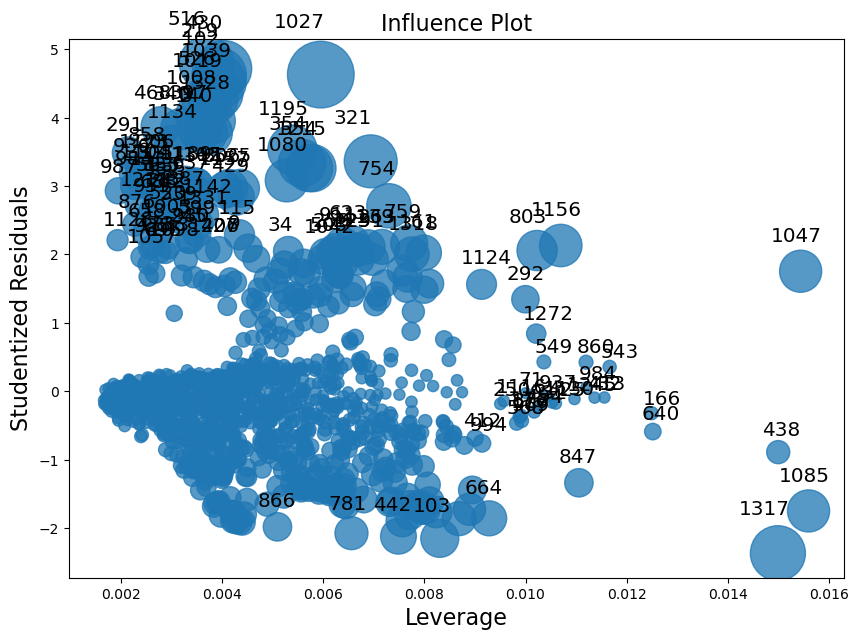

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
fig=sm.graphics.influence_plot(new_model_box,ax=ax, criterion="cooks")

In [33]:
new_infl_box = new_model_box.get_influence()

In [34]:
#threshold externally studentized residuals (box_cox)
n=1338
p=6
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=new_infl_box.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

print(med.index[atyp_stud],reg_studs[atyp_stud])

Index([   3,    9,   34,  102,  103,  115,  140,  143,  161,  219,  223,  242,
        245,  259,  263,  291,  305,  306,  321,  340,  353,  354,  355,  387,
        397,  427,  429,  430,  442,  468,  473,  503,  516,  520,  525,  526,
        533,  539,  554,  583,  599,  623,  637,  658,  688,  696,  754,  759,
        781,  803,  806,  858,  866,  876,  911,  925,  936,  957,  959,  980,
        983,  987, 1003, 1008, 1019, 1027, 1039, 1042, 1057, 1080, 1098, 1104,
       1123, 1128, 1134, 1139, 1142, 1156, 1157, 1162, 1189, 1195, 1206, 1211,
       1215, 1291, 1315, 1317, 1318, 1328, 1331],
      dtype='int64') [ 3.77603653  2.09072893  2.04605673  4.52123926 -2.14834567  2.28806189
  3.78144909  3.00112227  2.02560329  4.62071544  2.06893589  2.69641303
  2.20858417  2.07144837  2.11094712  3.48642355  3.06748623  3.22373056
  3.36047515  3.83337721  2.10838643  3.33489249  2.90243668  2.70206417
  3.82628628  2.06777335  2.83853758  4.71591388 -2.11698919  3.87186428
  2.1252776

In [35]:
#Cook's distance (log)
inflsum=new_infl_box.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(med.index[atyp_cook],reg_cook[atyp_cook])

Index([   3,    9,   11,   14,   30,   34,   57,   62,   82,   92,
       ...
       1288, 1291, 1313, 1315, 1317, 1318, 1321, 1328, 1331, 1337],
      dtype='int64', length=110) 3       0.008886
9       0.003291
11      0.003943
14      0.003371
30      0.003744
          ...   
1318    0.005217
1321    0.003059
1328    0.009808
1331    0.003530
1337    0.003162
Name: cooks_d, Length: 110, dtype: float64


In [36]:
index_1_box = med.index[atyp_stud].tolist()
index_2_box = med.index[atyp_cook].tolist()

union_list_box = list(set(index_1_box + index_2_box))
print(union_list_box)

[3, 516, 1027, 520, 9, 11, 525, 526, 1039, 14, 1042, 533, 1047, 539, 30, 1057, 34, 554, 1080, 57, 1085, 62, 577, 1093, 583, 1098, 1104, 82, 599, 1112, 92, 607, 98, 1123, 1124, 102, 103, 1128, 618, 1134, 623, 115, 1139, 1142, 637, 1156, 1157, 1162, 140, 143, 658, 664, 161, 1189, 1195, 1196, 688, 1206, 696, 1211, 1215, 219, 223, 1265, 242, 754, 244, 245, 759, 259, 262, 263, 1288, 1291, 781, 1313, 291, 803, 1315, 806, 1317, 1318, 292, 1321, 301, 1328, 305, 306, 1331, 819, 1337, 321, 847, 340, 854, 858, 353, 354, 355, 866, 876, 377, 890, 387, 397, 911, 925, 419, 936, 427, 429, 430, 442, 957, 959, 468, 980, 983, 473, 474, 987, 476, 1003, 1008, 503, 1019]


In [37]:
med_updated_box = med.drop(union_list_box)
model_updated_box =smf.ols('boxcox_charges ~ age + sex + bmi + children + C(smoker)',data=med_updated_box).fit()
bp_test = het_breuschpagan(model_updated_box.resid, model_updated_box.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 241.271017920421, 'LM-Test p-value': 4.098542850888982e-50}


In [38]:
stats.jarque_bera(model_updated_box.resid)

SignificanceResult(statistic=591.6413290507448, pvalue=3.362929505873638e-129)

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

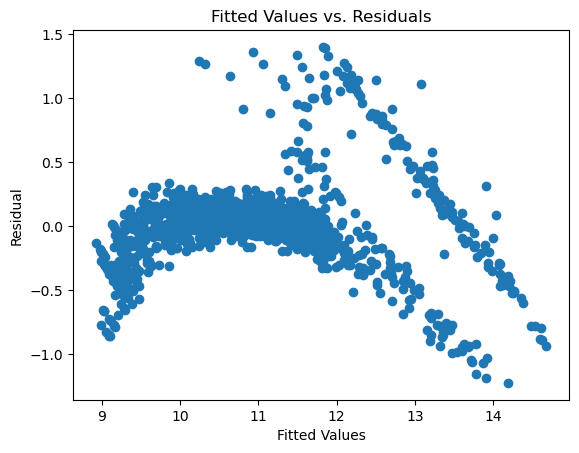

In [39]:
p = model_updated_box.fittedvalues
res = model_updated_box.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [40]:
all_models = [
smf.ols('charges~age + sex + bmi + children + C(smoker) + C(region)',data=med).fit(),
smf.ols('charges~age + bmi + C(smoker)',data=med).fit(),
smf.ols('log_charges ~ age + sex + bmi + children + C(smoker) + C(region)',data=med).fit(),
smf.ols('log_charges ~ age + sex + bmi + children + C(smoker)',data=med).fit()
]

full_models = smf.ols('charges~age + C(sex) + bmi + children + C(smoker) + C(region)',data=med).fit()


In [41]:
adj_r2 = list()
cp = list()
AIC = list()
BIC = list()

for i in range(len(all_models)):
    model_names = ['charges~age + sex + bmi + children + C(smoker) + C(region)',
                   'charges~age + bmi + C(smoker)',
                   'log_charges ~ age + sex + bmi + children + C(smoker) + C(region)',
                   'log_charges ~ age + sex + bmi + children + C(smoker)']
    adj_r2.append(all_models[i].rsquared_adj)
    # cp.append((all_models[i].ssr/full_models.mse_resid)-(1338-(2*7)))
    AIC.append(all_models[i].aic)
    BIC.append(all_models[i].bic)

In [42]:
data = {
    'adj_r2': adj_r2,
    # 'cp': cp,
    'AIC': AIC,
    'BIC': BIC
}
df = pd.DataFrame(data, index=model_names)
df

,adj_r2,AIC,BIC
charges~age + sex + bmi + children + C(smoker) + C(region),0.749414,27113.505837,27160.296218
charges~age + bmi + C(smoker),0.746909,27121.835916,27142.631641
log_charges ~ age + sex + bmi + children + C(smoker) + C(region),0.766551,1635.033399,1681.823780
log_charges ~ age + sex + bmi + children + C(smoker),0.762920,1652.701005,1683.894592
